<a href="https://colab.research.google.com/github/Sakshi281204/Data-Science/blob/main/File_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

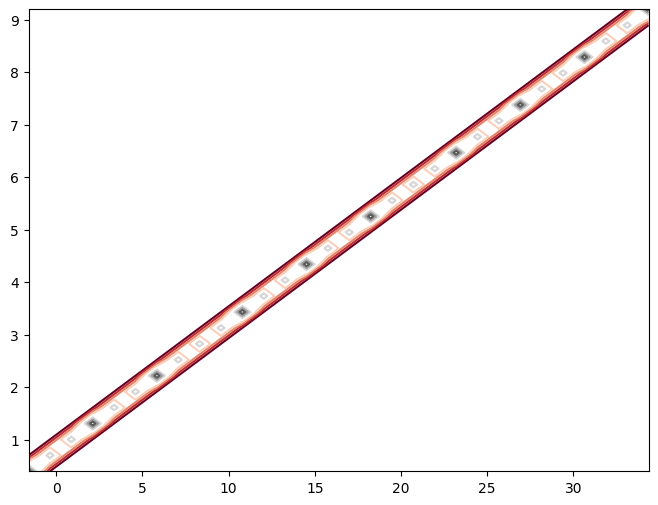

In [ ]:
import numpy as np
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load dataset as DataFrame
df = data.seattle_weather()

# Drop missing values for selected columns
df_clean = df[['date', 'precipitation', 'temp_max', 'temp_min', 'wind']].dropna()

# Convert to NumPy arrays
temp_max = df_clean['temp_max'].values
wind = df_clean['wind'].values

# Create meshgrid
x = np.linspace(temp_max.min(), temp_max.max(), 100)
y = np.linspace(wind.min(), wind.max(), 100)
counts, xedges, yedges = np.histogram2d(x, y,bins=30)
# print(xedges.shape, yedges.shape, counts.shape)
# print(xedges)
# print(yedges)
# print(counts)
# plt.hexbin(x,y,gridsize=30)

X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
Z = counts.T
# print(Z)
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z,cmap='RdGy')
# Perform KDE for Z values
# xy = np.vstack([temp_max, wind])
# kde = gaussian_kde(xy)
# Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

# plt.figure(figsize=(8, 6))
# plt.contour(X, Y, Z, levels=20, cmap='RdGy')
# plt.title("Contour Plot: Density of Temp Max vs Temp Min")
# plt.xlabel("Max Temperature (°C)")
# plt.ylabel("Min Temperature (°C)")
# plt.colorbar(label="Density")
# plt.grid(True)


[ 0.  10.9  0.8 ...  0.   0.   0. ]


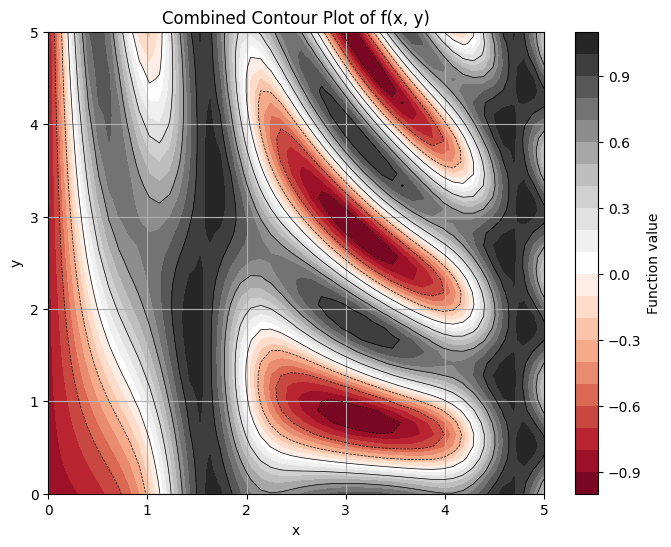

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from vega_datasets import data

# Load Seattle weather data
df = data.seattle_weather()
rainfall_mm = df['precipitation'].to_numpy()
print(rainfall_mm)  # Optional: Print rainfall values

# Define a function for contour plotting
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

# Create grid
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot with both filled contour and contour lines
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, 20, cmap='RdGy')     # Colored contours
plt.contour(X, Y, Z, colors='black', linewidths=0.5)  # Black contour lines over it
plt.colorbar(cp, label='Function value')        # Add colorbar
plt.title("Combined Contour Plot of f(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

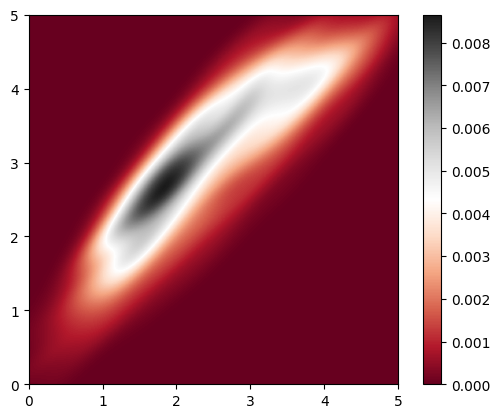

In [ ]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy',
interpolation='gaussian', aspect='equal')
plt.colorbar();

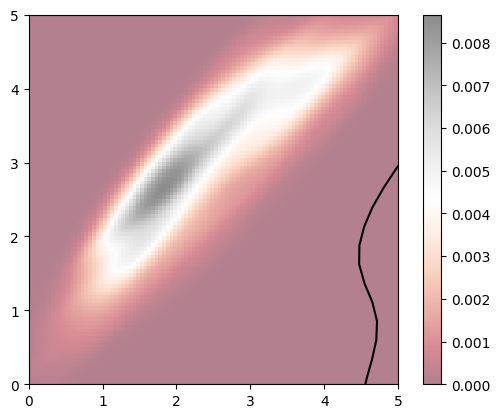

In [ ]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy', alpha=0.5)
plt.colorbar();

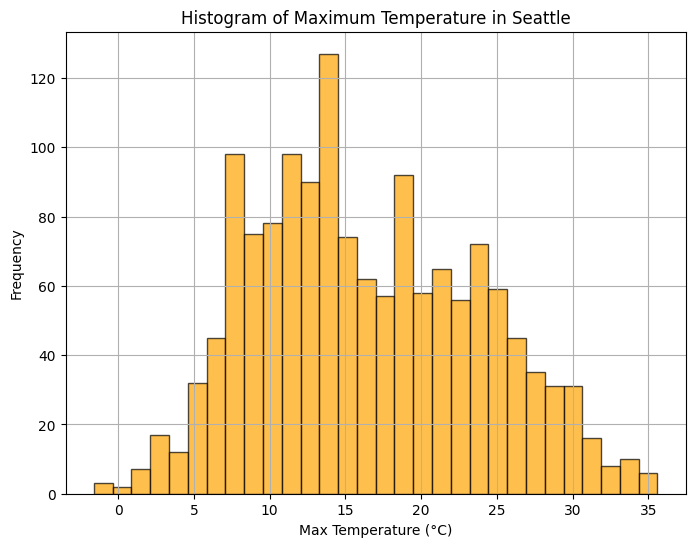

In [ ]:
import numpy as np
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt

df = data.seattle_weather()

temp_max = df['temp_max'].dropna()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(temp_max, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Histogram of Maximum Temperature in Seattle")
plt.grid(True)
plt.show()

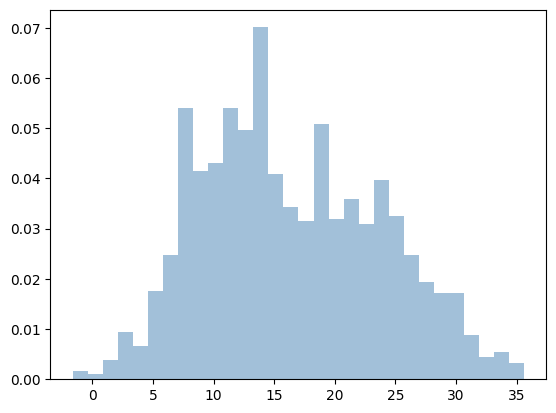

In [ ]:
plt.hist(temp_max, bins=30, density=True, alpha=0.5,
histtype='stepfilled', color='steelblue',
edgecolor='none');

In [ ]:
# x1 = rng.normal(0, 0.8, 1000)
# x2 = rng.normal(-2, 1, 1000)
# x3 = rng.normal(3, 2, 1000)
# kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
# plt.hist(x1, **kwargs)
# plt.hist(x2, **kwargs)
# plt.hist(x3, **kwargs);

In [ ]:
counts, bin_edges = np.histogram(temp_max, bins=5)
print(counts)

[ 73 484 470 332 102]


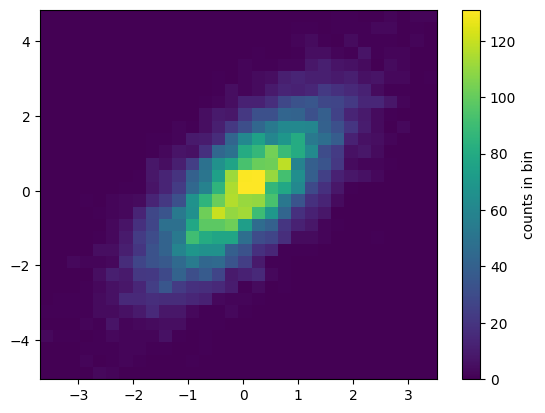

In [ ]:
rng=np.random.default_rng()
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x, y, bins=30)
cb = plt.colorbar()
cb.set_label('counts in bin')

In [ ]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
print(counts.shape)

(30, 30)


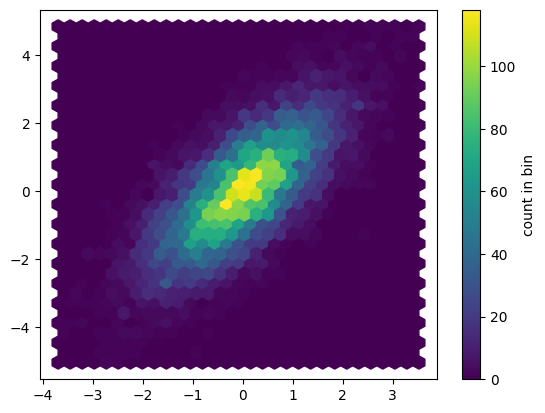

In [ ]:
plt.hexbin(x, y, gridsize=30)
cb = plt.colorbar(label='count in bin')

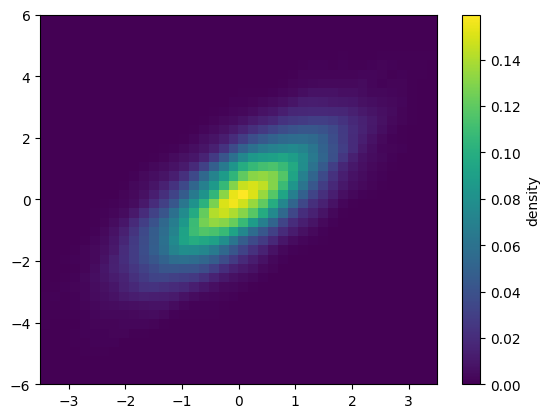

In [ ]:
from scipy.stats import gaussian_kde
 # fit an array of size [Ndim, Nsamples]
temp_max = np.vstack([x, y])
kde = gaussian_kde(temp_max)
# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
origin='lower', aspect='auto',
extent=[-3.5, 3.5, -6, 6])
cb = plt.colorbar()
cb.set_label("density")

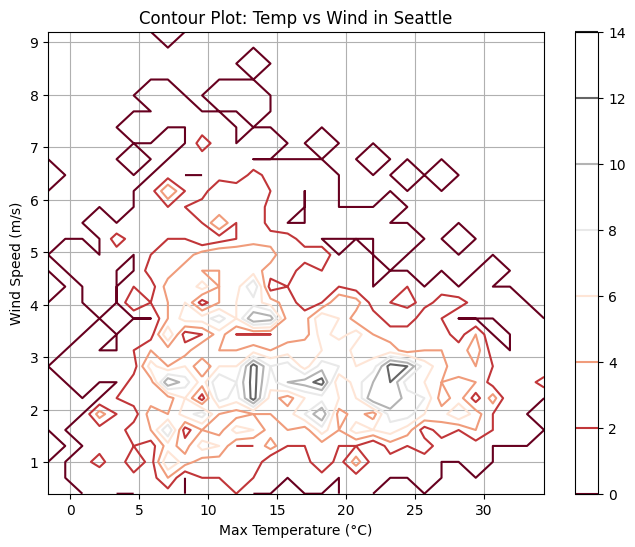

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from vega_datasets import data

# Load the Seattle weather dataset
df = data.seattle_weather()

# Display first few rows
# print(df.head())
# Remove rows with NaN values
df = df[['temp_max', 'wind']].dropna()

# Create grid
x = df['temp_max']
y = df['wind']
# Create 2D histogram (Z values)
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
# print(xedges.shape, yedges.shape, counts.shape)
# print(xedges,yedges,counts)

X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

Z = counts.T

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z,cmap='RdGy')
plt.colorbar()
plt.xlabel('Max Temperature (°C)') # temprature is btween 10 to 25 is usally high
plt.ylabel('Wind Speed (m/s)')#  wind speed is btween 1.5 to 4.5 is usally high
plt.title('Contour Plot: Temp vs Wind in Seattle')
plt.grid(True)


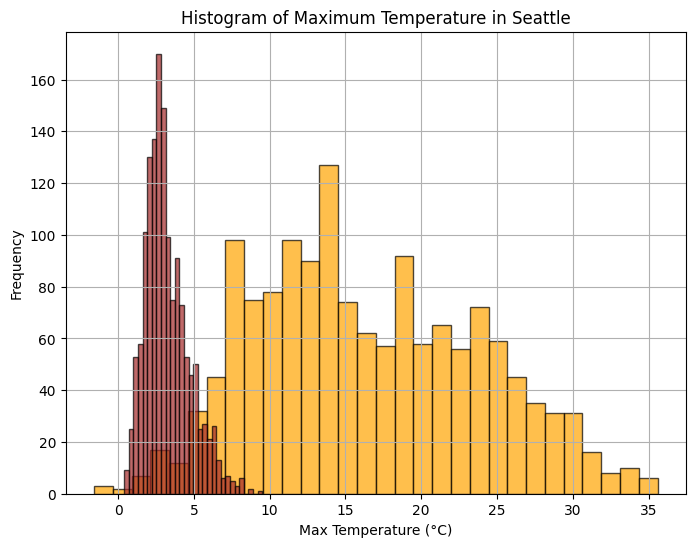

In [ ]:
import numpy as np
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt

df = data.seattle_weather()

temp_max = df['temp_max'].dropna()
wind=df['wind'].dropna()
x = df['temp_max']
y = df['wind']

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(temp_max, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.hist(wind, bins=30, color='brown', edgecolor='black', alpha=0.7)
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Histogram of Maximum Temperature in Seattle")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[x.min(), x.max(), y.min(), y.max()],
           origin='lower', cmap='RdGy', interpolation='gaussian', aspect='auto')
plt.colorbar(label='Frequency')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.title('Smooth Representation using imshow')
plt.grid(True)
plt.show()



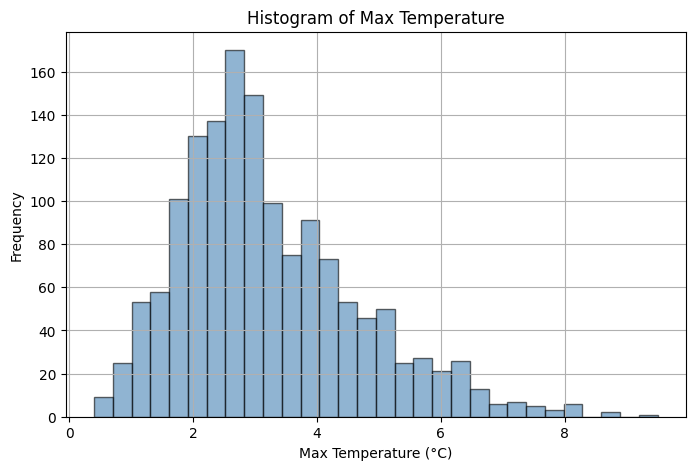

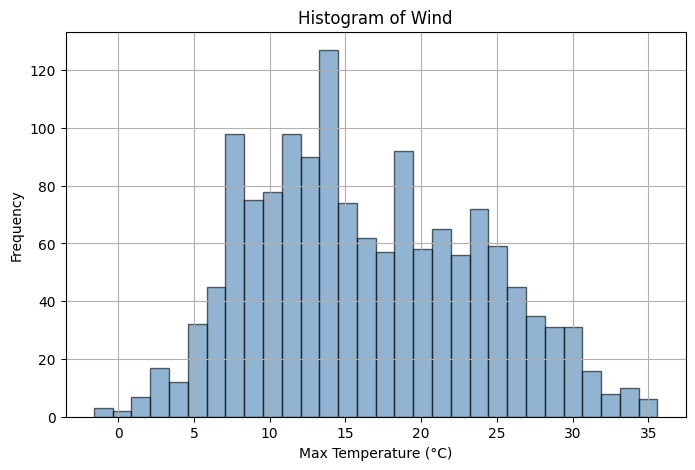

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['wind'], bins=30, alpha=0.6, color='steelblue', edgecolor='black')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Max Temperature')
plt.grid(True)
plt.show()

#(bar) for temp

plt.figure(figsize=(8, 5))
plt.hist(df['temp_max'], bins=30, alpha=0.6, color='steelblue', edgecolor='black')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Wind')
plt.grid(True)
plt.show()

#(bar for wind)